# Atividade: Perceptron

**INSTITUTO FEDERAL DE MINAS GERAIS**

*Departamento de Engenharia e Computação*   

*Professor: Ciniro Nametala Leite*

*Aluno: Luan Carlos dos Santos*

---

## Dependencias instaladas
### **Perguntar pro Ciniro por que usando o conda install pygwalker é mais rapido do que o pip install pygwalker**

In [327]:
#importação de pacotes
import numpy as np
import pandas as pd
import pygwalker as pyg #exploração de dados crocante
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report # machinelearning
import seaborn as sns
import plotly.graph_objects as go

In [328]:
#funcoes
#degrau bipolar
def degrau_bipolar(u):
   if u >= 0:
      y = 1
   else:
      y = -1
   return y

#funcao que classifica a amostra com base na rede ja treinada
def previsao(w, x):
   u = np.dot(w.T, x)
   yhat = degrau_bipolar(u)
   return yhat

In [329]:
#Passo 1: OBTER O CONJUNTO DE DADOS DE TREINAMENTO X

#carregar a tabela de dados
dados = pd.read_csv('data-sets/dataset_iris.csv', sep=';')

#Analise exploratoria de dados
# walker = pyg.walk(dados))

In [330]:
#quantidade de elementos na amostra
n_amostras = dados.shape[0]
print(n_amostras)

#quantidade de variaveis de entrada (subtrair a coluna tipo)
n_variaveis = dados.shape[1] -1
print(n_variaveis)

#separando os dadso contendo apenas as variáveis de entrada
x = dados.iloc[:, 0:n_variaveis].values
print(x)

30
3
[[-0.6508  0.1097  4.0009]
 [-1.4492  0.8896  4.4005]
 [ 2.085   0.6876 12.071 ]
 [ 0.2626  1.1476  7.7985]
 [ 0.6418  1.0234  7.0427]
 [ 0.2569  0.673   8.3265]
 [ 1.1155  0.6043  7.4446]
 [ 0.0914  0.3399  7.0677]
 [ 0.0121  0.5256  4.6316]
 [-0.0429  0.466   5.4323]
 [ 0.434   0.687   8.2287]
 [ 0.2735  1.0287  7.1934]
 [ 0.4839  0.4851  7.485 ]
 [ 0.4089 -0.1267  5.5019]
 [ 1.4391  0.1614  8.5843]
 [-0.9115 -0.1973  2.1962]
 [ 0.3654  1.0475  7.4858]
 [ 0.2144  0.7515  7.1699]
 [ 0.2013  1.0014  6.5489]
 [ 0.6483  0.2183  5.8991]
 [-0.1147  0.2242  7.2435]
 [-0.797   0.8795  3.8762]
 [-1.0625  0.6366  2.4707]
 [ 0.5307  0.1285  5.6883]
 [-1.22    0.7777  1.7252]
 [ 0.3957  0.1076  5.6623]
 [-0.1013  0.5989  7.1812]
 [ 2.4482  0.9455 11.2095]
 [ 2.0149  0.6192 10.9263]
 [ 0.2012  0.2611  5.4631]]


In [331]:
#inserindo bias
bias = np.ones((n_amostras, 1)) * -1

x = np.hstack((x, bias))

print(x)

[[-0.6508  0.1097  4.0009 -1.    ]
 [-1.4492  0.8896  4.4005 -1.    ]
 [ 2.085   0.6876 12.071  -1.    ]
 [ 0.2626  1.1476  7.7985 -1.    ]
 [ 0.6418  1.0234  7.0427 -1.    ]
 [ 0.2569  0.673   8.3265 -1.    ]
 [ 1.1155  0.6043  7.4446 -1.    ]
 [ 0.0914  0.3399  7.0677 -1.    ]
 [ 0.0121  0.5256  4.6316 -1.    ]
 [-0.0429  0.466   5.4323 -1.    ]
 [ 0.434   0.687   8.2287 -1.    ]
 [ 0.2735  1.0287  7.1934 -1.    ]
 [ 0.4839  0.4851  7.485  -1.    ]
 [ 0.4089 -0.1267  5.5019 -1.    ]
 [ 1.4391  0.1614  8.5843 -1.    ]
 [-0.9115 -0.1973  2.1962 -1.    ]
 [ 0.3654  1.0475  7.4858 -1.    ]
 [ 0.2144  0.7515  7.1699 -1.    ]
 [ 0.2013  1.0014  6.5489 -1.    ]
 [ 0.6483  0.2183  5.8991 -1.    ]
 [-0.1147  0.2242  7.2435 -1.    ]
 [-0.797   0.8795  3.8762 -1.    ]
 [-1.0625  0.6366  2.4707 -1.    ]
 [ 0.5307  0.1285  5.6883 -1.    ]
 [-1.22    0.7777  1.7252 -1.    ]
 [ 0.3957  0.1076  5.6623 -1.    ]
 [-0.1013  0.5989  7.1812 -1.    ]
 [ 2.4482  0.9455 11.2095 -1.    ]
 [ 2.0149  0.6192 10

In [332]:
#PASSO 2: do vetor de saida y, associar a saida esperada y para cada x
y = dados.iloc[:, n_variaveis].values
print(y)
#contar quatas amostras de cada classe existem no dataset
print(f"-1: {(y == -1).sum()}")
print(f"-1: {(x == -1).sum()}")

[-1. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.]
-1: 14
-1: 30


In [333]:
# inicializar o vetor de pesos w com valores aleatorios
w = np.random.uniform(-1, 1, n_variaveis + 1)
print(w)

[ 0.49883971 -0.77585236 -0.96253504 -0.0409115 ]


In [334]:
#PASSO 4: DEFINIR A TAXA DE APRENDIZAGEM COM VALOR ENTRE 0 E 1
#taxa de aprendizagem eta
eta = 0.01

#PASSO 5: CALCULAR O NUMERO DE AMOSTRAS EM X
#ja foi feito e esta em n_amostras

#PASSO 6: DEFINIR A TOLERÂNCIA AO ERRO - onde eu aceito que o resultado ta bom 
tolerancia = 0.01

#PASSO 7: SETAR O ERRO INICIAL MAIOR QUE A TOLERANCIA
erro_medio = tolerancia + 1 

#PASSO 8: CRIAR O VETOR QUE IRA ARMAZENAR O ERRO DE TODAS AS EPOCAS, EPOCA A EPOCA
erros_epocas = []

#PASSO 9: INICIALIZA O CONTADOR DE EPOCAS
epoca = 0

#PASSO 10: DEFINE O MÁXIMO DE ÉPOCAS 
max_epocas = 160

In [335]:
#PASSO 11 E 12: SETA OS CRITERIOS DE PARADA
criterio_erro = True
criterio_epoca = True

#PASSO 13: ENQUANTO O ERRO FOR MAIOR QUE A TOLERANCIA E MAXEPOCAS NAO FOR ATINGIDO, CONTINUE O TREINO
while criterio_erro and criterio_epoca:
   #PASSO 14: SETA O ERRO DA EPOCA ATUAL COM ZERO NO INICIO DE CADA EPOCA
   erro_atual = 0
   
   #PASSO 15: INCREMENTA O CONTADOR DE EPOCAS PARA SABER EM QUE ÉPOCA A RNA ESTA TREINANDO
   epoca += 1
   
   #PASSO 16: EMBARALHA OS INDICES PARA BUSCAR AMOSTRAS ALEATORIAMENTE NO CONJUNTO X
   indices_embaralhados = np.random.permutation(n_amostras) 
   
   #PASSO 17: PARA CADA AMOSTRA NO CONJUNTO X FAÇA
   for i in range(n_amostras):
      #captura o indice da amostra atual a ser apresentada da RNA
      indice_amostra = indices_embaralhados[i]
      
      #captura a amostra atual a ser apresentada a RNA
      xi_amostra = x[indice_amostra, :]
      
      #PASSO 18: CALCULA O POTENCIAL DE ATIVAÇÃO U
      u = np.dot(w.T, xi_amostra)
      
      #PASSO 19: CALCULA A SAÍDA PREVISTA COM BASE NA FUNCAO DE ATIVAÇAO
      yhat = degrau_bipolar(u)
      
      #PASSO 20: CALCULA O ERRO ENTRE O VALOR ESPERADO E O VALOR PREVISTO
      e = y[indice_amostra] - yhat
      
      #PASSO 21: ATUALIZA OS PESOS APLICANDO A REGRA DE HEBB
      w = w + ((eta * e) * xi_amostra)
      
      #PASSO 22: ACUMULADOR DE ERROS DE TODAS AS AMOSTRAS
      erro_atual = erro_atual + np.abs(e)
   
   #PASSO 23: CALCULA O ERRO MEDIO DA EPOCA
   erro_medio = erro_atual/n_amostras
   
   #PASSO 24: ARMAZENA O ERRO MEDIO DA EPOCA ATUAL NO VETOR DE ERROS DE TODAS AS EPOCAS
   erros_epocas.append(erro_medio)
   
   #PASSO 25 E 26: VERIFICA E ATUALIZA OS CRITERIOS DE PARADA
   criterio_erro = (erro_medio > tolerancia)
   criterio_epoca = (epoca < max_epocas)  
print(f'Época: {epoca}')

Época: 139


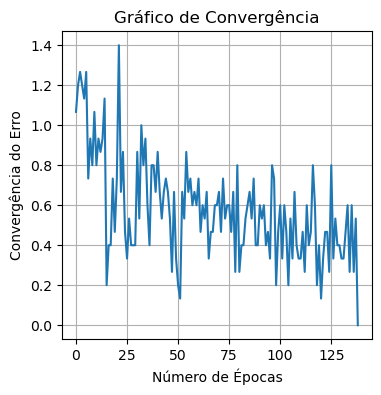

In [336]:
#PLOTANDO A CONVERGENCIA DO ALGORITMO COM BASE NO ERRO EPOCA A EPOCA
plt.figure(figsize=(4,4))
plt.plot((erros_epocas[:max_epocas]))
plt.title('Gráfico de Convergência')
plt.xlabel('Número de Épocas')
plt.ylabel('Convergência do Erro')
plt.grid(True)

## IMPLEMENTAÇÃO DO PERCEPTRON

In [337]:
#exibindo os pesos calibrados pela regra Regra de Hebb
print('Conjunto ideal de pesos w*')
print(w)
print('Quantidade de épocas até convergir')
print(epoca)

Conjunto ideal de pesos w*
[ 1.03398771  1.80424964 -0.47438704 -1.9809115 ]
Quantidade de épocas até convergir
139


In [338]:
#cria um vetor para receber todas a previsões realizadas pela rna
yhat = np.zeros(n_amostras)

#armazenar todas a previsoes uma para cada amostras
for i in range(n_amostras):
   yhat[i] = previsao(w, x[i,:])
   
print(yhat)

[-1. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.]


## ANÁLISE DA QUALIDADE DE CLASSIFICAÇÃO

Matriz de Confusão
[[14  0]
 [ 0 16]]


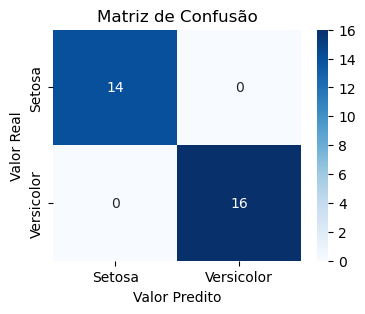

In [339]:
#converter -1 em 0 para melhor visualizar a matriz de confusão
yhat_display = np.where(yhat == -1, 0, yhat)
y_display = np.where(y == -1, 0, yhat)

#gera a matriz de confusão
cm = confusion_matrix(y_display, yhat_display)
print("Matriz de Confusão")
print(cm)

#plotar matriz de confusão crocante
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Setosa', 'Versicolor'],
            yticklabels=['Setosa', 'Versicolor'])
plt.title('Matriz de Confusão')
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.show()


In [340]:
#calculo acuracia

acuracia = (np.sum(yhat == y) / n_amostras) * 100
print(acuracia)

100.0


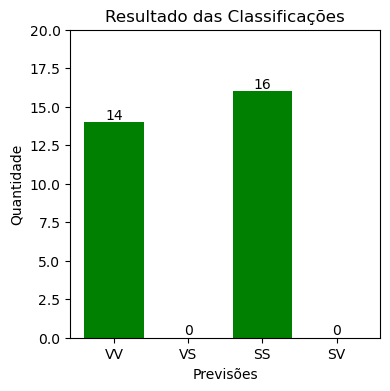

In [341]:
if cm.shape == (2, 2):
   resultado = [cm[0, 0], cm[0, 1], cm[1, 1], cm[1, 0]]
   labels = ['VV', 'VS', 'SS', 'SV']
   colors = ['green', 'red', 'green', 'red']
   
   plt.figure(figsize=(4, 4))
   plt.bar(labels, resultado, color=colors)
   plt.xlabel('Previsões')
   plt.ylabel('Quantidade')
   plt.title('Resultado das Classificações')
   plt.ylim(0, 20)
   for i, v in enumerate(resultado):
      plt.text(i, v + 0.2, str(v), ha='center')
   plt.show()

In [344]:
#criar grafico 3d interativo
colors = ['red' if y == -1 else 'blue' for y in yhat]

#criar malha para o hiperplano
x1_range = np.linspace(x[:, 0].min() - 0.5, x[:, 0].max() + 0.5, 20)
x2_range = np.linspace(x[:, 1].min() - 0.5, x[:, 1].max() + 0.5, 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

#calcular x3 para o hiperplano: w0*x1 + w1*x2 + w2*x3 + w3*(-1) = 0
#x3 = (w0*x1 + w1*x2 - w3) / (-w2)
x3_grid = (w[0] * x1_grid + w[1] * x2_grid - w[3]) / (-w[2])

fig = go.Figure()

#adicionar o hiperplano
fig.add_trace(go.Surface(
   x=x1_grid,
   y=x2_grid,
   z=x3_grid,
   colorscale='gray',
   opacity=0.3,
   showscale=False,
   name='Hiperplano'
))

#adicionar os pontos
fig.add_trace(go.Scatter3d(
   x=x[:, 0],
   y=x[:, 1],
   z=x[:, 2],
   mode='markers',
   marker=dict(
      size=8,
      color=colors,
      opacity=0.8,
      line=dict(width=1, color='white')
   ),
   name='Amostras'
))

fig.update_layout(
   title='Classificação',
   scene=dict(
      xaxis_title='x1',
      yaxis_title='x2',
      zaxis_title='x3'
   ),
   width=800,
   height=600
)